In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [112]:
data = pd.read_excel("Dataset_updated.xlsx")

In [113]:
data.head()

,patient_id,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,daily_steps,age,heart_disease_history,...,smoking_status,last_admitted,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,117693,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,33139,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,198703,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,116554,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,60943,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             25000 non-null  int64  
 1   insurance_with_us      25000 non-null  int64  
 2   regular_checkup        25000 non-null  int64  
 3   adventure_sports       25000 non-null  int64  
 4   occupation             25000 non-null  object 
 5   visited_doctors        25000 non-null  int64  
 6   cholesterol            25000 non-null  object 
 7   daily_steps            25000 non-null  int64  
 8   age                    25000 non-null  int64  
 9   heart_disease_history  25000 non-null  int64  
 10  other_major_disease    25000 non-null  int64  
 11  gender                 25000 non-null  object 
 12  glucose_level          25000 non-null  int64  
 13  bmi                    24010 non-null  float64
 14  smoking_status         25000 non-null  object 
 15  la

In [115]:
data.isna().sum()   

patient_id                   0
insurance_with_us            0
regular_checkup              0
adventure_sports             0
occupation                   0
visited_doctors              0
cholesterol                  0
daily_steps                  0
age                          0
heart_disease_history        0
other_major_disease          0
gender                       0
glucose_level                0
bmi                        990
smoking_status               0
last_admitted            11881
location                     0
weight                       0
insurance_company            0
alcohol_consumption          0
exercise_regimen             0
weight_change                0
fat_percentage               0
insurance_cost               0
dtype: int64

In [116]:
le = LabelEncoder()
categorical_columns = ['gender','insurance_company','location','occupation']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [117]:
data.head() 
data = data.drop(['last_admitted','patient_id'], axis = 1)
print(data['alcohol_consumption'].unique() )
print(data['exercise_regimen'].unique() )
print(data['smoking_status'].unique() )

['Rare' 'Daily' 'No']
['Moderate' 'Extreme' 'No']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [118]:
categories = [['No','Rare','Daily']]

encoder = OrdinalEncoder(categories=categories)
data['alcohol_consumption'] = encoder.fit_transform(data['alcohol_consumption'].values.reshape(-1,1))

categories = [['No','Moderate','Extreme']]
encoder_exercise = OrdinalEncoder(categories=categories)
data['exercise_regimen'] = encoder_exercise.fit_transform(data['exercise_regimen'].values.reshape(-1,1))

categories = [['Unknown','never smoked','formerly smoked','smokes']]
encoder_smoking = OrdinalEncoder(categories=categories)
data['smoking_status'] = encoder_smoking.fit_transform(data['smoking_status'].values.reshape(-1,1))

In [119]:
def calculate_midpoint(range_str):
    start, end = map(int, range_str.split(' to '))
    return (start + end) / 2

data['cholesterol'] = data['cholesterol'].apply(calculate_midpoint)

In [120]:
data.head()

,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,daily_steps,age,heart_disease_history,other_major_disease,...,bmi,smoking_status,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,3,1,1,1,2,137.5,4866,28,1,0,...,31.2,0.0,3,67,0,1.0,1.0,1,25,20978
1,0,0,0,2,4,162.5,6411,50,0,0,...,34.2,2.0,6,58,0,1.0,1.0,3,27,6170
2,1,0,0,0,4,212.5,4509,68,0,0,...,40.4,2.0,6,73,0,2.0,2.0,0,32,28382
3,7,4,0,0,2,187.5,6214,51,0,0,...,22.9,0.0,3,71,1,1.0,0.0,3,37,27148
4,3,1,0,2,2,162.5,4938,44,0,1,...,26.5,1.0,1,74,0,0.0,2.0,0,34,29616


In [121]:
df = data
df = df.dropna()
X = df[["weight", "age"]]
y = df["bmi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_bmi = KNeighborsRegressor(n_neighbors=5)

model_bmi.fit(X_train, y_train)

df_missing = data[data['bmi'].isna()]

X_missing = df_missing[["weight", "age"]]


predicted_bmi = model_bmi.predict(X_missing)

data.loc[data['bmi'].isna(), 'bmi'] = predicted_bmi


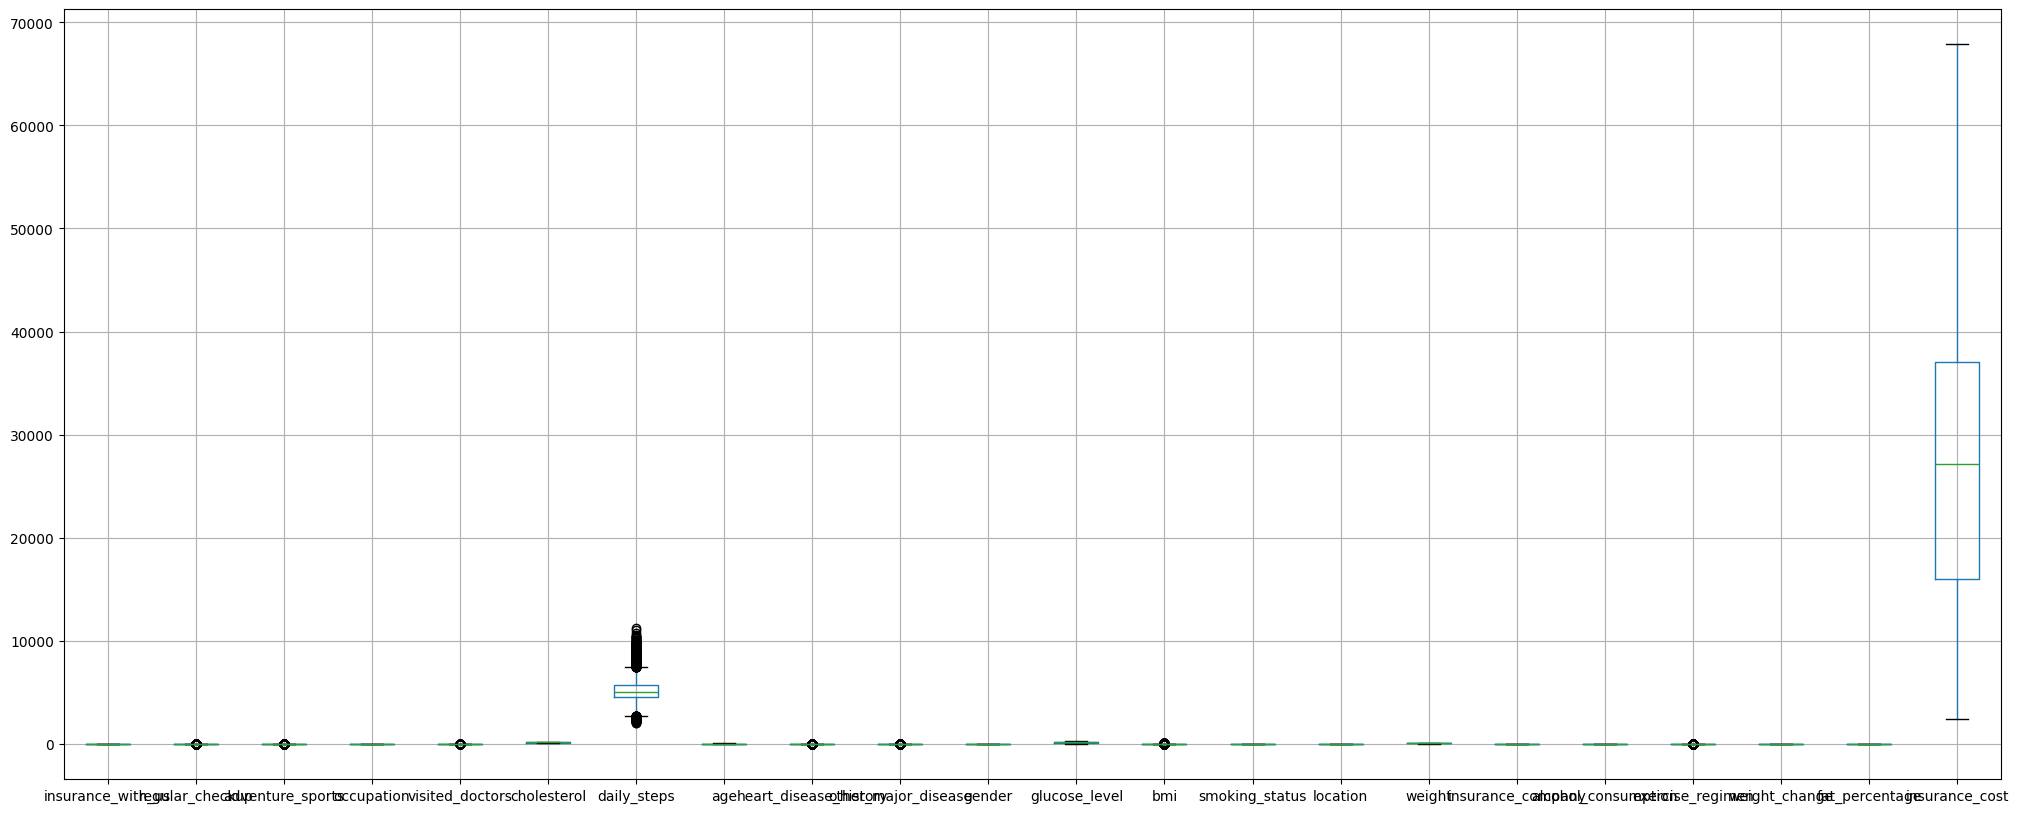

In [122]:
plt.figure(figsize=(25,10))
data.boxplot()
plt.show()

In [123]:
import warnings
warnings.filterwarnings('ignore')

data['daily_steps'] = np.sqrt(data['daily_steps'])

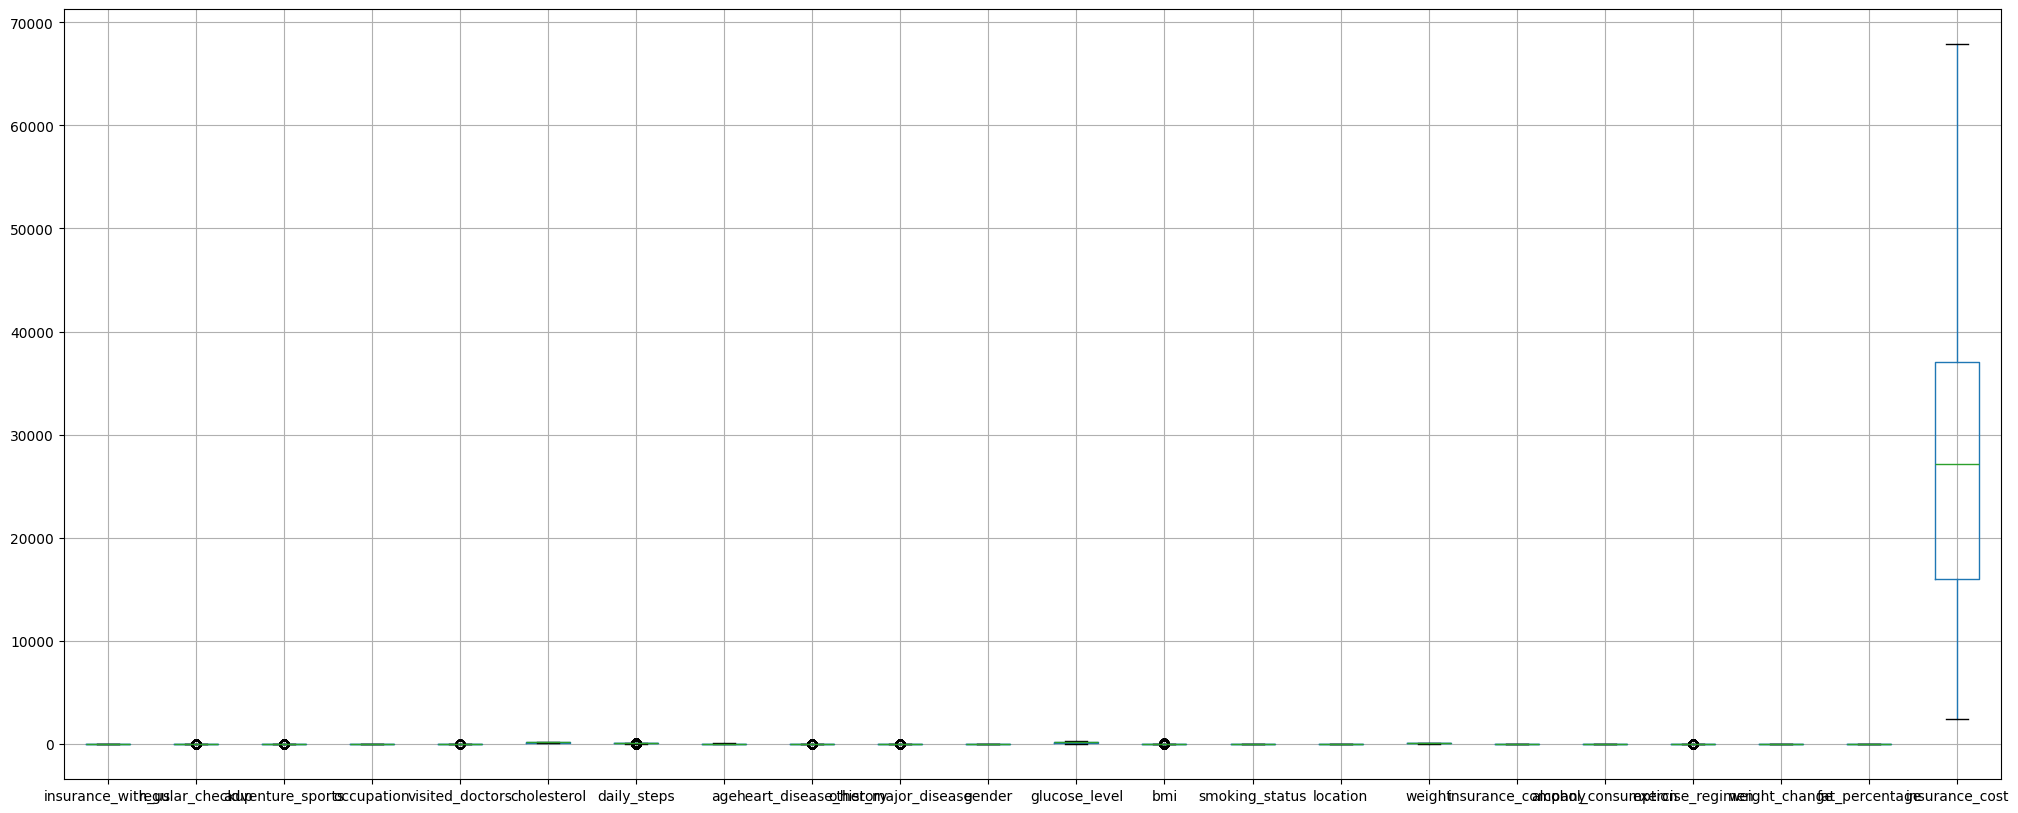

In [124]:
plt.figure(figsize=(25,10))
data.boxplot()
plt.show()

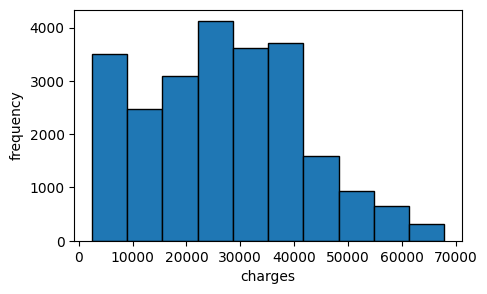

In [125]:
plt.figure(figsize=(5,3))
plt.hist(df['insurance_cost'],bins=10,edgecolor='black')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

In [126]:
scaler = StandardScaler()

data[['daily_steps','cholesterol','glucose_level','weight','age','bmi']] = scaler.fit_transform(data[['daily_steps','cholesterol','glucose_level','weight','age','bmi']])
data.head()


,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,daily_steps,age,heart_disease_history,other_major_disease,...,bmi,smoking_status,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,3,1,1,1,2,-1.002742,-0.296257,-1.050360,1,0,...,-0.025826,0.0,3,-0.494422,0,1.0,1.0,1,25,20978
1,0,0,0,2,4,-0.210186,1.150403,0.315492,0,0,...,0.361313,2.0,6,-1.459569,0,1.0,1.0,3,27,6170
2,1,0,0,0,4,1.374926,-0.662079,1.433007,0,0,...,1.161400,2.0,6,0.149010,0,2.0,2.0,0,32,28382
3,7,4,0,0,2,0.582370,0.976474,0.377576,0,0,...,-1.096910,0.0,3,-0.065467,1,1.0,0.0,3,37,27148
4,3,1,0,2,2,-0.210186,-0.224123,-0.057013,0,1,...,-0.632344,1.0,1,0.256249,0,0.0,2.0,0,34,29616


In [127]:
data.isna().sum()

insurance_with_us        0
regular_checkup          0
adventure_sports         0
occupation               0
visited_doctors          0
cholesterol              0
daily_steps              0
age                      0
heart_disease_history    0
other_major_disease      0
gender                   0
glucose_level            0
bmi                      0
smoking_status           0
location                 0
weight                   0
insurance_company        0
alcohol_consumption      0
exercise_regimen         0
weight_change            0
fat_percentage           0
insurance_cost           0
dtype: int64

In [128]:
data.head()

,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,daily_steps,age,heart_disease_history,other_major_disease,...,bmi,smoking_status,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,3,1,1,1,2,-1.002742,-0.296257,-1.050360,1,0,...,-0.025826,0.0,3,-0.494422,0,1.0,1.0,1,25,20978
1,0,0,0,2,4,-0.210186,1.150403,0.315492,0,0,...,0.361313,2.0,6,-1.459569,0,1.0,1.0,3,27,6170
2,1,0,0,0,4,1.374926,-0.662079,1.433007,0,0,...,1.161400,2.0,6,0.149010,0,2.0,2.0,0,32,28382
3,7,4,0,0,2,0.582370,0.976474,0.377576,0,0,...,-1.096910,0.0,3,-0.065467,1,1.0,0.0,3,37,27148
4,3,1,0,2,2,-0.210186,-0.224123,-0.057013,0,1,...,-0.632344,1.0,1,0.256249,0,0.0,2.0,0,34,29616


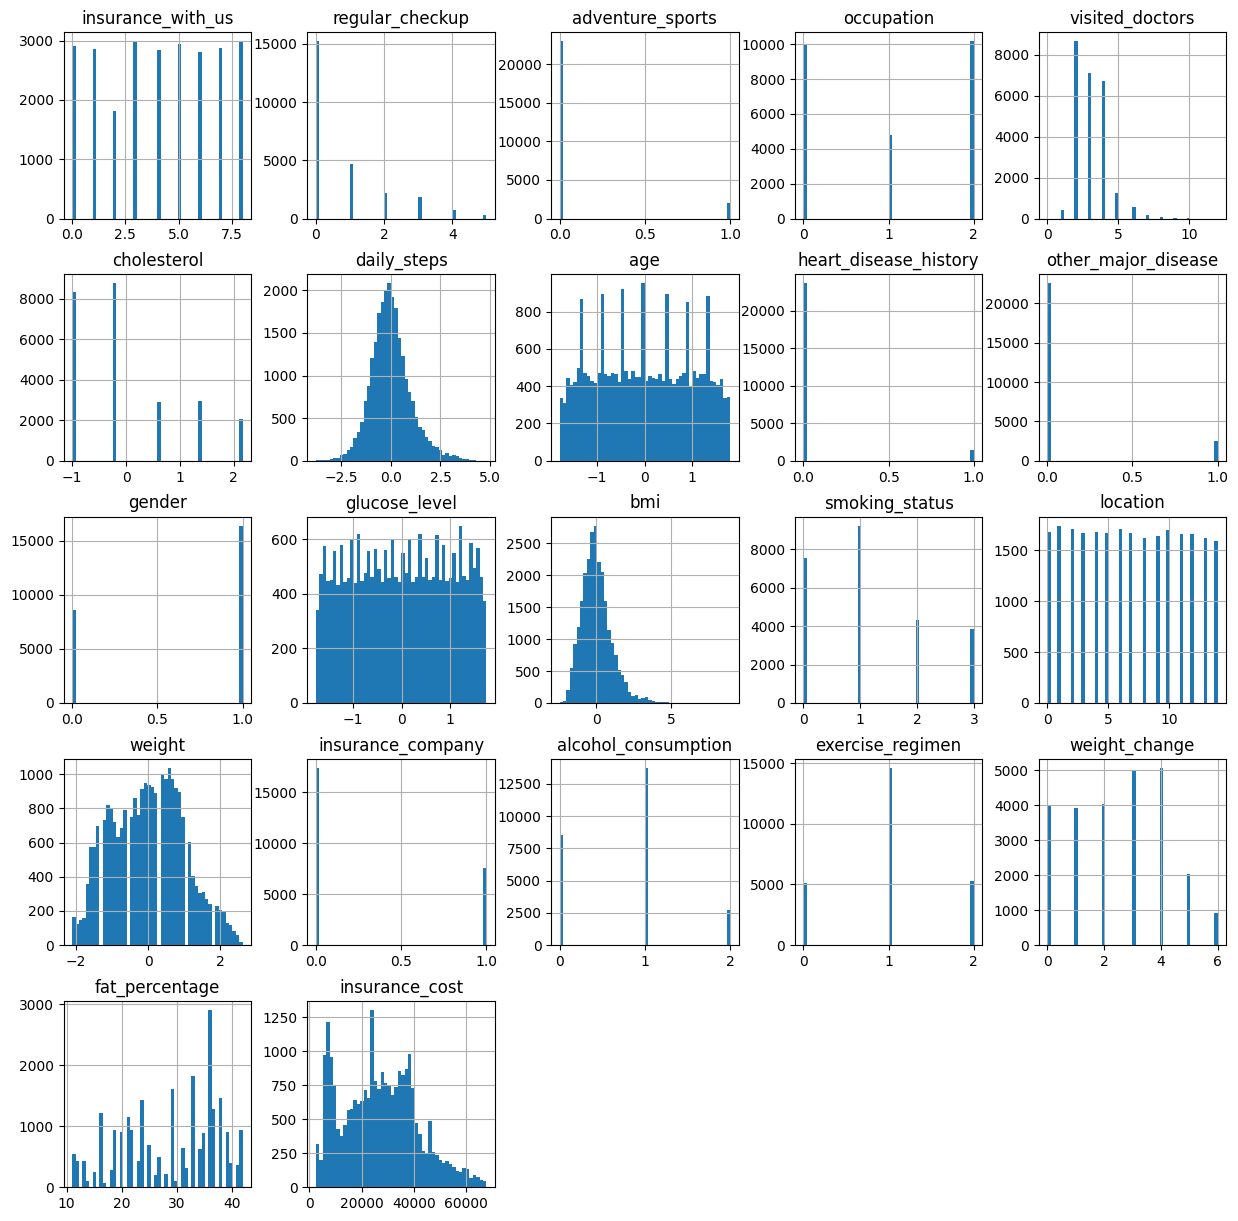

In [129]:
data.hist(bins=50, figsize=(15, 15))
plt.show()

In [130]:
data.head()

,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,daily_steps,age,heart_disease_history,other_major_disease,...,bmi,smoking_status,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,3,1,1,1,2,-1.002742,-0.296257,-1.050360,1,0,...,-0.025826,0.0,3,-0.494422,0,1.0,1.0,1,25,20978
1,0,0,0,2,4,-0.210186,1.150403,0.315492,0,0,...,0.361313,2.0,6,-1.459569,0,1.0,1.0,3,27,6170
2,1,0,0,0,4,1.374926,-0.662079,1.433007,0,0,...,1.161400,2.0,6,0.149010,0,2.0,2.0,0,32,28382
3,7,4,0,0,2,0.582370,0.976474,0.377576,0,0,...,-1.096910,0.0,3,-0.065467,1,1.0,0.0,3,37,27148
4,3,1,0,2,2,-0.210186,-0.224123,-0.057013,0,1,...,-0.632344,1.0,1,0.256249,0,0.0,2.0,0,34,29616


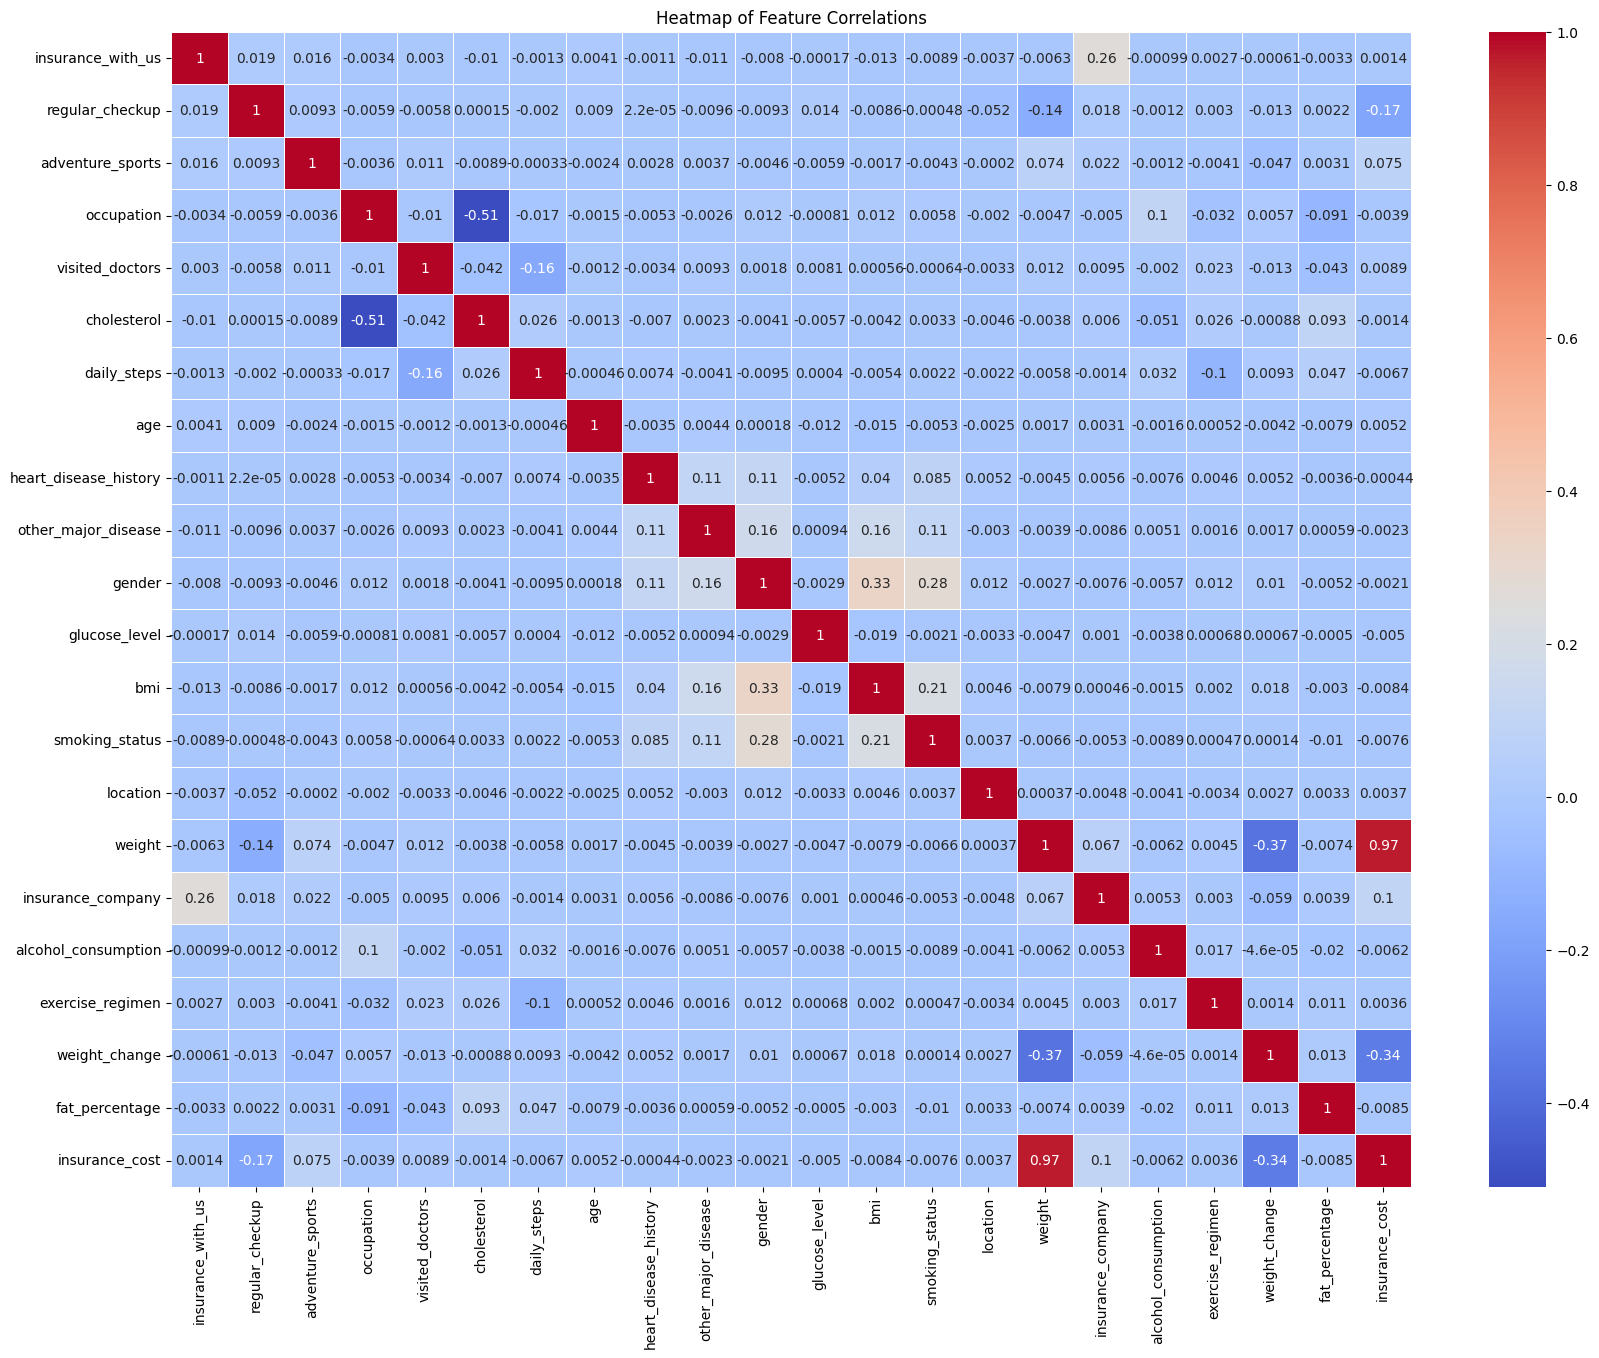

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [132]:
data = data.drop(['other_major_disease','insurance_with_us','heart_disease_history'], axis=1)

In [133]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
X = data.drop('insurance_cost', axis=1) 
y = data['insurance_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R²-score:", metrics.r2_score(y_test, y_pred))

R²-score: 0.944087130482742


In [135]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("R²-score:", metrics.r2_score(y_test, y_pred))


R²-score: 0.9527721334025335


In [136]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())

Cross-validated R² scores: [0.94408713 0.94466371 0.9439722  0.9453579  0.94463155]
Mean R² score: 0.944542499867245
